<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_17/TidyTuesday_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inspiration



*   https://twitter.com/avrodrigues_/status/1384591428148473856



# Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import datetime

# Data Prep

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv')

# Drop rows with no date added value
df = df[~df['date_added'].isna()]

# Month and year added
df['month_added'] = pd.to_datetime(df['date_added']).dt.month
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Number of titles added in each year and month
df_count = (df.
            groupby(['year_added', 'month_added']).
            count()['title'].
            reset_index().
            rename(columns = {'title':'num_title'}))

# Average titles released per month
df_count_avg = (df_count.
                  groupby('month_added').
                  mean().
                  reset_index()[['month_added', 'num_title']])

# Clean up
month_names = ['January', 'February', 'March',
               'April', 'May', 'June',
               'July', 'August', 'September',
               'October', 'November', 'December']
df_count_avg['month_added'] = month_names
df_count_avg['num_title'] = (df_count_avg['num_title'].
                              round().
                              astype(int))
# Norm num titles between a range (0 to 1)
df_count_avg['normed_num_titles'] = (df_count_avg['num_title'] - df_count_avg['num_title'].min()) / (df_count_avg['num_title'].max() - df_count_avg['num_title'].min())           

# Inspect
df_count_avg

,month_added,num_title,normed_num_titles
0,January,84,0.727273
1,February,52,0.000000
2,March,96,1.000000
3,April,86,0.772727
4,May,68,0.363636
5,June,77,0.568182
6,July,86,0.772727
7,August,77,0.568182
8,September,69,0.386364
9,October,87,0.795455


# Plotting

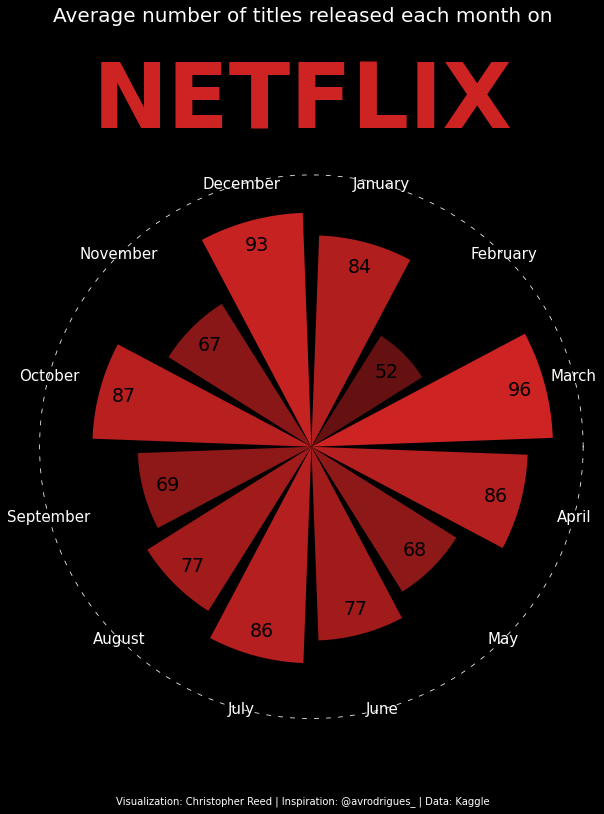

In [35]:
################
## POLAR PREP ##
################

# Num slices (months)
N = df_count_avg.shape[0]

# Start and end angle for polar plot
start_angle = (5 * np.pi) / 12
end_angle = start_angle - (2*np.pi)

# Theta and radius for each month
theta = np.linspace(start_angle, end_angle, 12, endpoint = False)
radii = df_count_avg['num_title'].to_list()

# Width of each slice
width = 0.45

####################
## COLOR MAP PREP ##
####################

# Reference: https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale

# Create segment color map between custom colors
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#661111", "#CD2323"])

# Map colors to normed avg num of titles (scaled between 0 and 1. done in data prep section)
colors = custom_cmap(df_count_avg['normed_num_titles'].to_list())

########################
## CREATE BASE FIGURE ##
########################

# Fig, ax on polar coords
fig, ax = plt.subplots(figsize = (10,10))
ax = plt.subplot(projection = 'polar')

# Bar plot. Use `colors` which is the based on the colormap created earlier
ax.bar(x = theta,
       height = radii,
       width = width,
       bottom = 0.0,
       color = colors)

############
## LABELS ##
############

# Month labels
for theta_label, radii_label, month_label in zip(theta, df_count_avg['num_title'], df_count_avg['month_added']):
  ax.text(x = theta_label,
          y = 108,
          s = month_label,
          fontsize = 15,
          color = 'white',
          ha = 'center',
          va = 'center')

# Mean num titles labels
for theta_label, radii_label, month_label in zip(theta, df_count_avg['num_title'], df_count_avg['month_added']):
  ax.text(x = theta_label,
          y = radii_label - 10,
          s = radii_label,
          fontsize = 19,
          ha = 'center',
          va = 'center')
  
############
## TITLES ##
############

fig.text(x = 0.5, y = 1.1,
         s = 'Average number of titles released each month on',
         color = 'white',
         fontsize = 20,
         ha = 'center',
         va = 'center')

fig.text(x = 0.5, y = 0.98,
         s = 'NETFLIX',
         color = '#CD2323',
         fontsize = 90,
         weight = 'bold',
         ha = 'center',
         va = 'center')



###############
## GRIDLINES ##
###############

# Set spine to dashed linetype
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
ax.spines['polar'].set_linestyle((0, (5,10)))
ax.spines['polar'].set_color('#f4f4f4')

# Remove gridlines
ax.grid(False)

# Y-tick labels removes the radial labels
# Xtick labels removes the degree labels around the spine
ax.set_yticklabels([])
ax.set_xticklabels([])

# Radius limit. 108 bc based on the position of the month labels
ax.set_ylim(0, 108)

#############
## CREDITS ##
#############
fig.text(x = 0.5, y = 0.01,
         s = 'Visualization: Christopher Reed | Inspiration: @avrodrigues_ | Data: Kaggle',
         color = 'white',
         fontsize = 10,
         ha = 'center',
         va = 'center')

#######################
## BACKGROUND COLORS ##
#######################
ax.set_facecolor('black')
fig.set_facecolor('black')

#####################################
## SAVE INTERMEDIATE STEPS FOR GIF ##
#####################################


filename = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
plt.savefig('/content/drive/MyDrive/TidyTuesday/Netflix/' + filename, facecolor = 'black', bbox_inches = 'tight')
# plt.savefig('Netflix High Res', facecolor = 'black', bbox_inches = 'tight', dpi = 1200)

# Making Of GIF

Work in progress.... Images not saving correctly so displayed incorrectly in gif :(

In [ ]:
import os
for filename in os.listdir('/content/drive/MyDrive/TidyTuesday/Netflix'):
  print(filename)

In [37]:
import imageio
images = []
for filename in os.listdir('/content/drive/MyDrive/TidyTuesday/Netflix'):
    images.append(imageio.imread('/content/drive/MyDrive/TidyTuesday/Netflix/' + filename))

imageio.mimsave('movie.gif', images)